# Diferentes tipos de rendimiento

In [5]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'
end_date = '2021-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
St

[*********************100%%**********************]  2 of 2 completed


,NAFTRAC.MX,VOO
Date,,
2015-01-02,42.090000,160.364807
2015-01-05,41.049999,157.547333
2015-01-06,41.310001,155.998154
2015-01-07,41.810001,157.947388
2015-01-08,42.410000,160.722321
...,...,...
2020-12-24,43.580002,325.113647
2020-12-28,44.080002,327.941498
2020-12-29,44.689999,327.251343


In [4]:
# Obten rendimientos
rt = St.pct_change()
rt

,NAFTRAC.MX,VOO
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.024709,-0.017569
2015-01-06,0.006334,-0.009833
2015-01-07,0.012104,0.012495
2015-01-08,0.014351,0.017569
...,...,...
2020-12-24,-0.005023,0.003996
2020-12-28,0.011473,0.008698
2020-12-29,0.013838,-0.002104


In [6]:
# Rendiiento aritmetico VOO
(1 + rt.VOO).prod()

2.054416014313866

In [7]:
# Rendimiento geometrico
rg = ((1 + rt.VOO).prod())**(1/len(rt.VOO)) - 1
rg

0.00047661374515284294

In [11]:
# ¿Cuanto da por año el S&P?
rg*252

0.12010663475470107

In [24]:
# Valores esperados acciones
ve_usa  = rt.VOO.mean()
ve_mx = rt['NAFTRAC.MX'].mean()

# Volatilidad acciones 
s_usa = rt.VOO.std()
s_mx = rt['NAFTRAC.MX'].std()

# Correlacion
corr_usa_mx =  rt.corr()['NAFTRAC.MX']['VOO']

# Covarianza
cov_usa_mx =  rt.cov()['NAFTRAC.MX']['VOO']


$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$


$$cov(a,b) = \sigma_a \sigma_b corr(a,b) $$

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b \sigma_a \sigma_b corr(a,b)$$


In [26]:
def volatility_correlation(df, s_usa, s_mx, correlation):
    w1 = df['w_usa']
    w2 = df['w_mx']
    sP = np.sqrt(w1**2 * s_usa**2 + w2**2 * s_mx**2 + 2*correlation*s_usa * s_mx * w1*w2)
    return sP
df = pd.DataFrame({
    'w_usa': w,
    'w_mx': 1-w,
    'expected_value': (w*ve_usa + (1-w*ve_mx)) * 252
})


df['real_volatility'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, corr_usa_mx), axis=1) * 252**0.5
df['volatility_corr1'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 1), axis=1) * 252**0.5
df['volatility_corr0'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 0), axis=1) * 252**0.5
df['volatility_corr-1'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, -1), axis=1) * 252**0.5



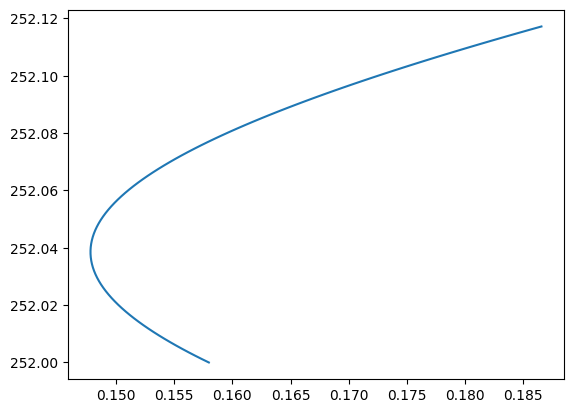

In [31]:
plt.plot(df.real_volatility, df.expected_value)

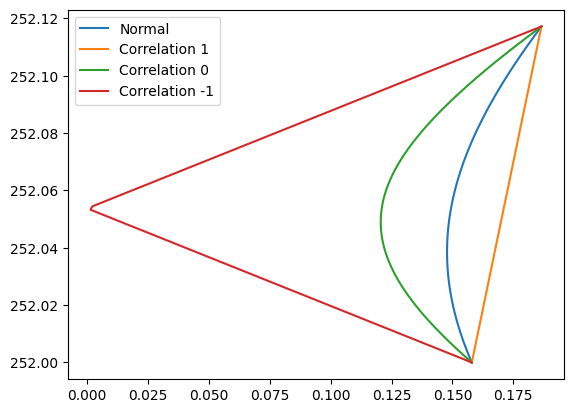

In [33]:
plt.plot(df.real_volatility, df.expected_value, label="Normal")
plt.plot(df['volatility_corr1'], df.expected_value, label="Correlation 1")
plt.plot(df['volatility_corr0'], df.expected_value, label="Correlation 0")
plt.plot(df['volatility_corr-1'], df.expected_value, label="Correlation -1")
plt.legend(loc='best')

## Varios activos

In [35]:
tickers = ['VOO', 'VEA', 'VWO', 'VNQ', 'NAFTRAC.MX']
start_date = '2015-01-01'
end_date = '2021-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change()

[*********************100%%**********************]  5 of 5 completed


In [39]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(returns):
    def rand_weights(n):
        k = np.random.rand(n)
        return k / sum(k)
    # Definimos las constantes
    means = rt.mean()
    sigma = returns.cov()
    # Obtenemos pesos
    n_act = len(rt.keys())
    w = rand_weights(n_act)
    # Rendimiento esperado
    re = w.dot(means) * 252
    # Varianza
    variance = w.dot(sigma).dot(w.T) 
    vol = np.sqrt(variance) * np.sqrt(252)
    return re, vol, w
random_portafolio(rt)

(0.08274353485546336,
 0.17528385921766468,
 array([0.0627118 , 0.3140079 , 0.31540325, 0.10942234, 0.1984547 ]))

In [48]:
# Simula 500 portafolios 
portafolio4_act_returns = []
portafolio4_act_vol = []
weigths = []
for i in range(500):
    mu, sigma, w = random_portafolio(rt)
    portafolio4_act_returns.append(mu)
    portafolio4_act_vol.append(sigma)
    weigths.append(w)

    
df_final = pd.DataFrame()
df_final['returns'] = portafolio4_act_returns
df_final['sigma'] = portafolio4_act_vol
df_final['w'] = weigths

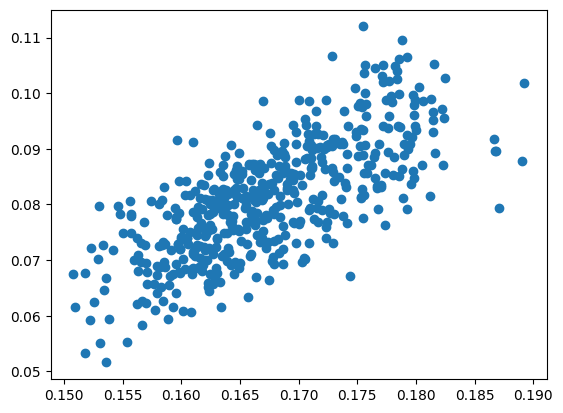

In [51]:
plt.scatter(df_final.sigma, df_final.returns)

# ¿en que invertir para obtener el de mínima varianza?

In [60]:
df_final[df_final.sigma == df_final.sigma.min()].w.values

array([array([0.45378477, 0.23979383, 0.02506635, 0.23482122, 0.04653382])],
      dtype=object)

In [61]:
tickers

['VOO', 'VEA', 'VWO', 'VNQ', 'NAFTRAC.MX']

# Más riesgo, más volatilidad?

In [62]:
resultados_final = pd.DataFrame()
resultados_final['valor_esperado'] = rt.mean()*252
resultados_final['volatilidad'] = rt.std() * np.sqrt(252)


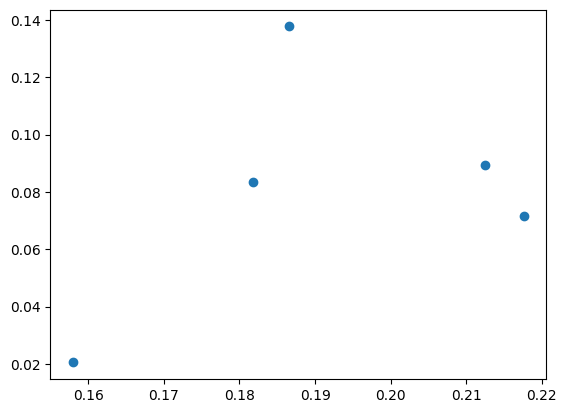

In [64]:
plt.scatter(resultados_final.volatilidad, resultados_final.valor_esperado)

In [67]:
from sklearn.linear_model import LinearRegression

In [75]:
y = resultados_final[['valor_esperado']]
X = resultados_final[['volatilidad']]
model = LinearRegression().fit(X,y)

In [76]:
resultados_final['predicciones'] = model.predict(X)


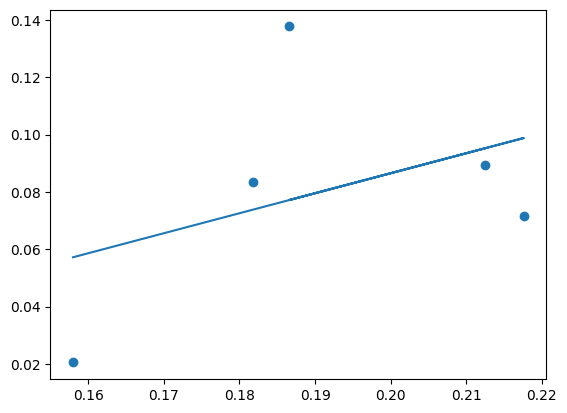

In [79]:
plt.scatter(resultados_final.volatilidad, resultados_final.valor_esperado)
plt.plot(resultados_final.volatilidad, resultados_final.predicciones)

In [80]:
model.intercept_

array([-0.05301552])

In [81]:
model.coef_

array([[0.69756024]])